# COVID-19 East African Countries Dashboard
_last updated: April 19,2020._

### What is COVID-19

> Coronaviruses are a large family of viruses that may cause respiratory illnesses in humans ranging from common colds to more severe conditions such as Severe Acute Respiratory Syndrome (SARS) and Middle Eastern Respiratory Syndrome (MERS).1 'Novel coronavirus' is a new, previously unidentified strain of coronavirus. The novel coronavirus involved in the current outbreak has been named SARS-CoV-2 by the World Health Organization (WHO). 3The disease it causes has been named “coronavirus disease 2019” (or “COVID-19”).`

![](https://camo.githubusercontent.com/2fb766cd8fddab459c68eb0382cab7ca28c385f1/68747470733a2f2f7777772e617074612e636f6d2f77702d636f6e74656e742f75706c6f6164732f686f6d652d62616e6e65722d312e6a7067)


### Symptoms:
People may be sick with the virus for 1 to 14 days before developing symptoms. The most common symptoms of coronavirus disease (COVID-19) are fever, tiredness, and dry cough. Most people (about 80%) recover from the disease without needing special treatment.

- Cough
- Fever
- Tiredness
- Difficulty in breathing(severe cases)

In [2]:

# importing libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

In [3]:
# loading data right from the source:
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [4]:
# data cleaning

# renaming the df column names to lowercase
country_df.columns = map(str.lower, country_df.columns)
confirmed_df.columns = map(str.lower, confirmed_df.columns)
death_df.columns = map(str.lower, death_df.columns)
recovered_df.columns = map(str.lower, recovered_df.columns)

# changing province/state to state and country/region to country
confirmed_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
recovered_df = confirmed_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
death_df = death_df.rename(columns={'province/state': 'state', 'country/region': 'country'})
country_df = country_df.rename(columns={'country_region': 'country'})
# country_df.head()

In [5]:
# total number for African Countries
afro_country_df_ind = country_df.set_index("iso3")
afro_country_df_sel = afro_country_df_ind[["country","confirmed","deaths","recovered","active","incident_rate","mortality_rate"]]

afro_country_df_ea = afro_country_df_sel.loc[["KEN","UGA","RWA","TZA","MUS","ZWE","MOZ","BDI","ETH","DJI","SSD","MDG","ZMB","SYC","SOM","ERI","MWI"]]
afro_country_df_ea_ren = afro_country_df_ea.rename(columns={'country': 'Country','confirmed':'Confirmed Cases','deaths':'Reported Deaths',
                                                            'recovered':'Recovered Cases','active':'Currently Active Cases','incident_rate':'Incident Rate',
                                       'mortality_rate':'Mortality Rate'})



In [6]:
# total number of confirmed, death and recovered cases
confirmed_total = int(afro_country_df_ea['confirmed'].sum())
deaths_total = int(afro_country_df_ea['deaths'].sum())
recovered_total = int(afro_country_df_ea['recovered'].sum())
active_total = int(afro_country_df_ea['active'].sum())

In [7]:
# displaying the total stats

display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

### COVID-19 Cases by country

In [8]:
# sorting the values by confirmed descednding order
# country_df.sort_values('confirmed', ascending= False).head(10).style.background_gradient(cmap='copper')
fig = go.FigureWidget( layout=go.Layout() )
def highlight_col(x):
    o = 'background-color: #FF851B'
    s = 'background-color: #DDDDDD'
    t = 'background-color: #39CCCC'
    l = 'background-color: #01FF70'
    df1 = pd.DataFrame('', index=x.index, columns=x.columns)
    df1.iloc[:, 0] = o
    df1.iloc[:, 1] = s
    df1.iloc[:, 2] = t
    df1.iloc[:, 3] = l
    
    return df1

def show_latest_cases(n):
    n = int(n)
    return afro_country_df_ea_ren.sort_values('Confirmed Cases', ascending= False).head(n).style.apply(highlight_col, axis=None)

interact(show_latest_cases, n='20')

ipywLayout = widgets.Layout(border='solid 2px green')
ipywLayout.display='none' # uncomment this, run cell again - then the graph/figure disappears
widgets.VBox([fig], layout=ipywLayout)

interactive(children=(Text(value='20', description='n'), Output()), _dom_classes=('widget-interact',))

    'data': [], 'layout': {'template': '...'}
}),), layout=Layout(border='solid …

### COVID-19 cases per Country


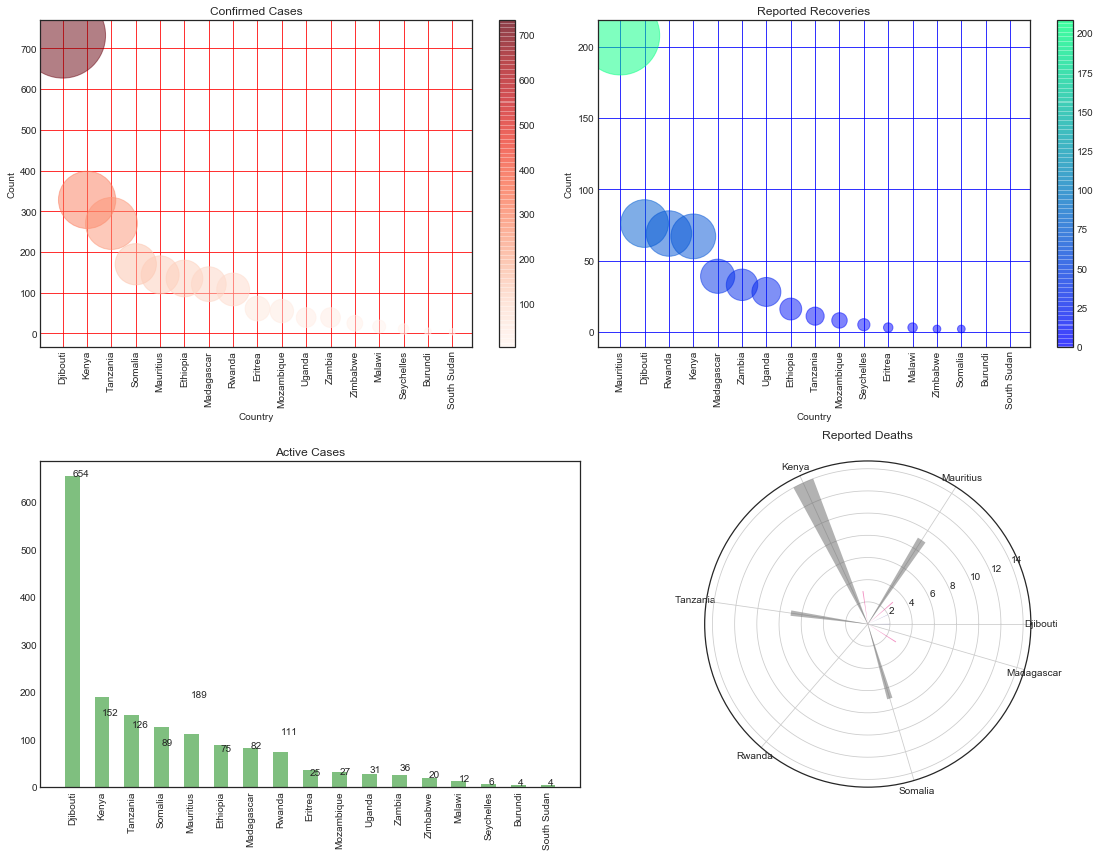

In [10]:

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16, 12)
plt.style.use('seaborn-white')


rng = afro_country_df_ea.sort_values('confirmed', ascending= False)
x = rng.country
y1 = rng.deaths
sizes1 = rng.deaths*100
colors1 = rng.deaths/100

colors = plt.cm.Dark2(rng.deaths)

rng2 = afro_country_df_ea.sort_values('recovered', ascending= False)
x2 = rng2.country
y2 = rng2.recovered
sizes2 = rng2.recovered*30
colors2 = rng2.recovered

rng3 = afro_country_df_ea.sort_values('active', ascending= False)
x3 = rng3.country
y4 = rng3.active

y3 = rng.confirmed
sizes3 = rng.confirmed*10
colors3 = rng.confirmed


#fig, (ax1,ax2,ax3) = plt.subplots(1,3)

plt.subplot(2,2,1)
plt.scatter(x3, y3, c=colors3, s=sizes3, alpha=0.5,
            cmap='Reds')
plt.xticks(x, rotation='vertical')
plt.xlabel('Country')
plt.title('Confirmed Cases')
plt.ylabel('Count')
plt.grid(b=True, color='r')
plt.colorbar(); 

plt.subplot(2,2,4,projection='polar')
plt.bar(x, y1,color=colors, width=colors1, alpha=0.5)
plt.title('Reported Deaths')

plt.subplot(2,2,3)
ax = plt.bar(x3, y4,color='g', width=0.5, alpha=0.5)
plt.xticks(x, rotation='vertical')
for i in range(len(y4)):
    plt.annotate(str(y4[i]), xy=(x[i],y4[i]))
plt.title('Active Cases')


plt.subplot(2,2,2)
plt.scatter(x2, y2, c=colors2, s=sizes2, alpha=0.5,
            cmap='winter')
plt.xticks(x, rotation='vertical')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Reported Recoveries')
plt.grid(b=True, color='b')
plt.colorbar();
plt.tight_layout()

### Confirmed cases per Country

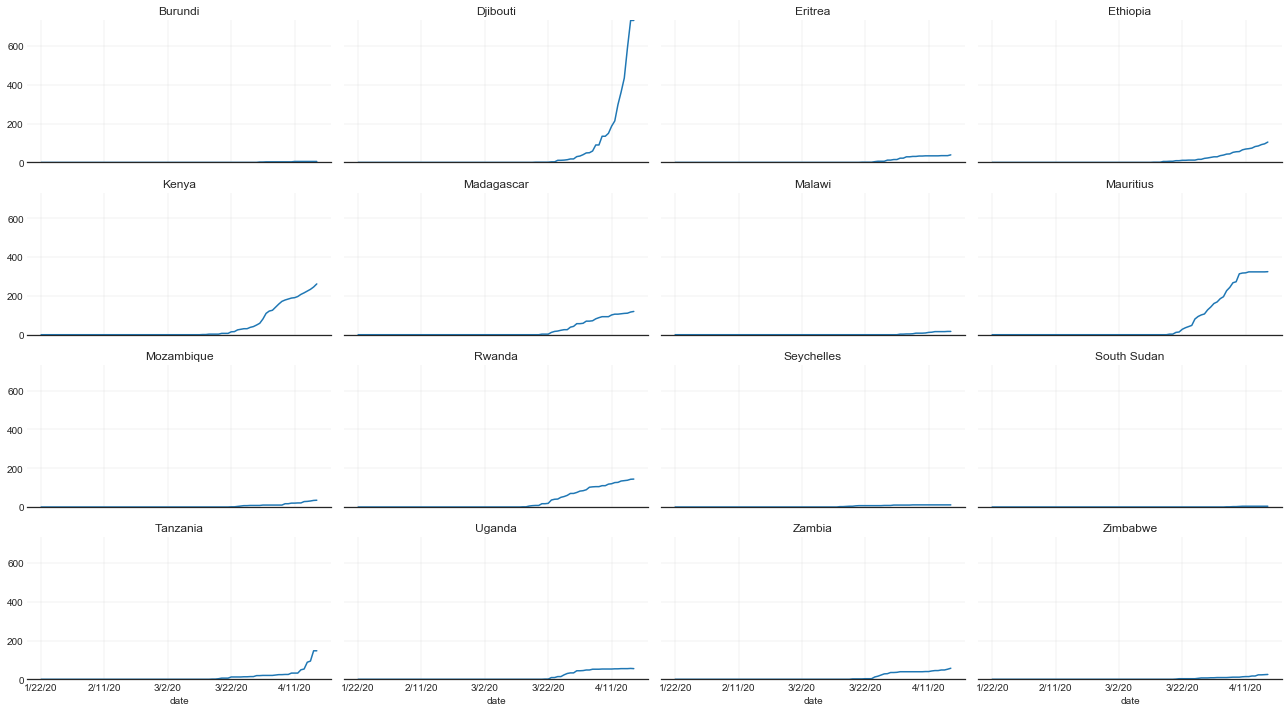

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 

df=pd.melt(confirmed_df,id_vars=['state', 'country','lat','long'],var_name='date', value_name='values')
df_ea = df[df['country'].isin(["Kenya","Uganda","Tanzania","Rwanda","Malawi","Eritrea","Seychelles","Zambia","Madagascar","South Sudan",
                              "Djibouti","Ethiopia","Burundi","Mozambique","Zimbabwe","Mauritius"])]
y_min = df_ea['values'].min()
y_max = df_ea['values'].max()

for countryname, selection in df_ea.groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='date', y='values',label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_ylim((y_min, y_max))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    plt.tight_layout()

    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### Death cases per Country

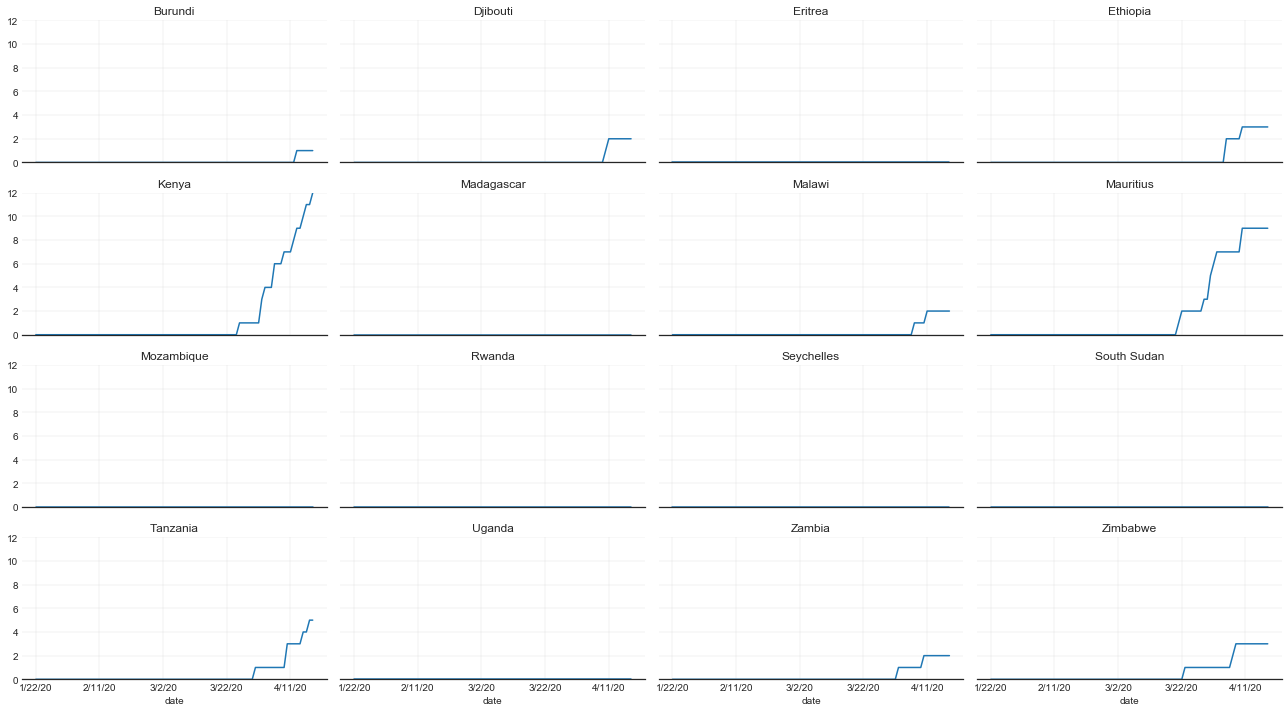

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True, sharey='row', figsize=(18,10))
axes_list = [item for sublist in axes for item in sublist] 


df2=pd.melt(death_df,id_vars=['state', 'country','lat','long'],var_name='date', value_name='values')
df_ea2 = df2[df2['country'].isin(["Kenya","Uganda","Tanzania","Rwanda","Malawi","Eritrea","Seychelles","Zambia","Madagascar","South Sudan",
                              "Djibouti","Ethiopia","Burundi","Mozambique","Zimbabwe","Mauritius"])]


y_min = df_ea2['values'].min()
y_max = df_ea2['values'].max()

for countryname, selection in df_ea2.groupby("country"):
    ax = axes_list.pop(0)
    selection.plot(x='date', y='values', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.25)
    ax.set_ylim((y_min, y_max))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    
    
# Now use the matplotlib .remove() method to 
# delete anything we didn't use
for ax in axes_list:
    ax.remove()

### Incident and Mortality Rates per Country

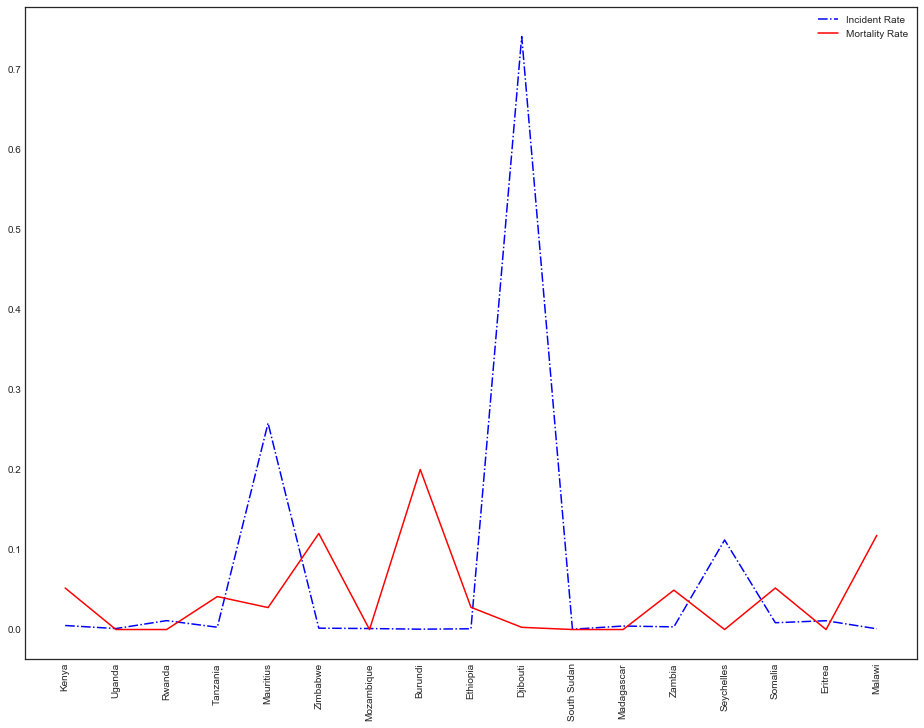

In [13]:
x= afro_country_df_ea.country
ir= afro_country_df_ea.incident_rate/100
dr= afro_country_df_ea.mortality_rate/100

# Use ax for both
plt.plot(x,ir,'b-.',label='Incident Rate')
plt.plot(x,dr,color='red',label='Mortality Rate')
plt.xticks(x, rotation='vertical')
plt.legend()

### Global spread

In [14]:
world_map = folium.Map(location=[11,0], tiles="cartodbpositron", zoom_start=2, max_zoom = 6, min_zoom = 2)


for i in range(0,len(confirmed_df)):
    folium.Circle(
        location=[confirmed_df.iloc[i]['lat'], confirmed_df.iloc[i]['long']],
        fill=True,
        radius=(int((np.log(confirmed_df.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='red',
        fill_color='indigo',
        tooltip = "<div style='margin: 0; background-color: black; color: white;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed_df.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: white;'>"+
                    "<ul style='color: white;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed_df.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death_df.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death_df.iloc[i,-1]/(confirmed_df.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)

world_map